In [162]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [163]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

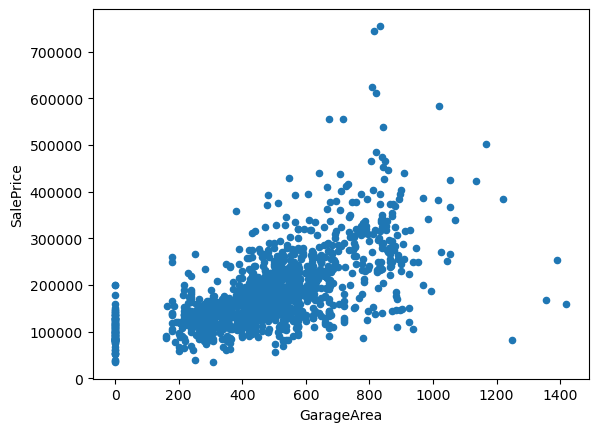

In [164]:
df_copy = df.copy()
df_test = df_copy[["GarageArea","SalePrice"]]
df_test.plot(x="GarageArea", y="SalePrice", kind="scatter")

In [165]:
df_test.corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


In [166]:
reg = LinearRegression()
x = df_copy[["TotRmsAbvGrd","GarageArea","OverallQual","GrLivArea","1stFlrSF"]]
y = df_copy["SalePrice"].values.reshape(-1,1)
reg.fit(x,y)

LinearRegression()

In [167]:
reg.score(x,y)

0.7535748297418405

In [168]:
test = pd.read_csv("test.csv")
test_copy = test.copy()
test_int_columns = test_copy[["TotRmsAbvGrd","GarageArea","OverallQual","GrLivArea","1stFlrSF"]]
test_int_columns = test_int_columns.fillna(test_int_columns["GarageArea"].mean())
test_int_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  1459 non-null   int64  
 1   GarageArea    1459 non-null   float64
 2   OverallQual   1459 non-null   int64  
 3   GrLivArea     1459 non-null   int64  
 4   1stFlrSF      1459 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


In [169]:
sample = pd.read_csv("sample_submission.csv")
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [178]:
final["Id"] = sample["Id"]
final["SalePrice"] = reg.predict(test_int_columns)
final.to_csv("final.csv", index=False)